In [1]:
import itertools
from scipy.stats import norm
from collections import namedtuple
import math
import numpy as np

from src.naboo.visualization import plot_map

In [2]:
CartesianPoint = namedtuple('CartesianPoint', 'x y')
Vector = namedtuple('Vector', 'x y')

In [3]:
def pairwise_circle(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ... (s<last>,s0)"
    a, b = itertools.tee(iterable)
    first_value = next(b, None)
    return itertools.zip_longest(a, b,fillvalue=first_value)

In [4]:
def prob_collision(distance, uncertainty):
    # Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

    # mi    : média         : location (loc)
    # sigma : desvio padrão : scale

    return norm.sf(distance, loc=0, scale=uncertainty)

In [5]:
def distance_point_line(P, A, B, return_normal=False):
    '''Calculates the distance between the point P and the line that crosses the points A and B'''
    
    # Director vector of line
    D = Vector((A.x - B.x), (A.y - B.y))
 
    # Normal vector of line
    #N = Vector(-D.y, D.x)
    
    # Normalized normal vector of line AB
    aux = (math.sqrt(D.y**2+D.x**2))
    N = Vector( (D.y/aux), ((-D.x)/aux) )
    
    
    b = N.x * A.x + N.y * A.y
    
    distance = P.x * N.x + P.y * N.y - b
    
    if return_normal:
        return distance, N
    
    return distance
    

In [6]:
def chance_constraint(P, obs):
    distances = []
    
    for A, B in pairwise_circle(obs):
        aux_distance = distance_point_line(P, A, B)
        distances.append(aux_distance)
    
    
    distance = max(distances)
    uncertainty = 1 # GPS imprecision
    
    chance = prob_collision(distance, uncertainty)
    return chance

EXECUTION

chance constraint = 0.8413447460685429


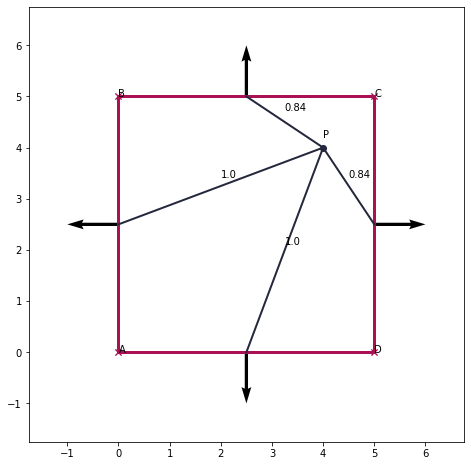

In [9]:
A = CartesianPoint(0,0)
B = CartesianPoint(0,5)
C = CartesianPoint(5,5)
D = CartesianPoint(5,0)

segments = [[A,B], [B,C], [C,D], [D,A]]
segment_texts = [['A','B'],['',''],['C','D'],['','']]


points = [
    CartesianPoint(4,4)
]
point_texts = [
    'P'
]

distances = []
normals = []

for P in points:
    for (a, b) in segments:
        dist, normal = distance_point_line(P, a, b, return_normal=True)
        distances.append(dist)
        normals.append(normal)
    

obs = [A, B, C, D]
chance = chance_constraint(points[0], obs)
print(f'chance constraint = {chance}')

plot_map(
    margin=1.5,
    stress=True,
    chance=True,
    segments=segments,
    segment_texts=segment_texts,
    normals=normals,
    pointes=points,
    point_texts=point_texts,
    #distances=distances
    distances=np.around(prob_collision(distances, 1),2)
)